In [1]:
%matplotlib inline
%autosave 0

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

Autosave disabled


# Import data

In [2]:
ex2data = np.genfromtxt("/Users/nunopires/Documents/Coursera/machine-learning-ex2/ex2/ex2data1.txt",
                        delimiter=',')

# create X and Y matrices, one observation per row
X = ex2data[:,:2]

Y = ex2data[:,2]

print(X.shape, Y.shape)

(100, 2) (100,)


# Functions

In [3]:
def transform(x):
    ''' Add polynomial features'''
    poly = PolynomialFeatures(2)
    return poly.fit_transform(x)

def DoNothing(x):
    return x

def plotBoundary(X, reg, mesh = 200, function = DoNothing):
    '''Plots the decision boundary for fitted regression.
    If X data was transformed prior to training, specify function here'''
    
    x = np.linspace(min(X[:,0]), max(X[:,0]), mesh)
    y = np.linspace(min(X[:,1]), max(X[:,1]), mesh) 
    
    h = []
    for i in x:
        for j in y:
            h.append(np.array([i,j]))
        
    Xt = function(h)
    
    z = reg.predict(Xt).reshape(len(x), len(y))
    
    # Plot 
    on = Y == 1 # positives
    off = Y == 0 # negatives

    bound = plt.contour(x, y, z,
                    levels = [0.5],
                    colors=('grey'))
    plt.clabel(bound, inline=1, fontsize=10)
    plt.plot(X[on, 0], X[on, 1], 'o', color = 'blue'); # Y positives
    plt.plot(X[off, 0], X[off, 1], 'o', color = 'red'); # Y negatives

## Fit logistic regression

In [4]:
# linear
reg = LogisticRegression()
reg.fit(X, Y)

# transform X (e.g. polynomial)
Xt = transform(X)
reg2 = LogisticRegression()
reg2.fit(Xt, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Scores

In [5]:
print('------ reg --------')
print(metrics.classification_report(Y, reg.predict(X)))
print('------ reg2 --------')
print(metrics.classification_report(Y, reg2.predict(Xt)))


------ reg --------
             precision    recall  f1-score   support

        0.0       1.00      0.68      0.81        40
        1.0       0.82      1.00      0.90        60

avg / total       0.89      0.87      0.86       100

------ reg2 --------
             precision    recall  f1-score   support

        0.0       1.00      1.00      1.00        40
        1.0       1.00      1.00      1.00        60

avg / total       1.00      1.00      1.00       100



## Plot

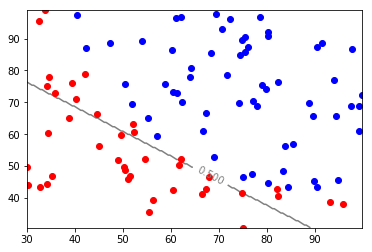

In [6]:
plotBoundary(X, reg, mesh = 200)

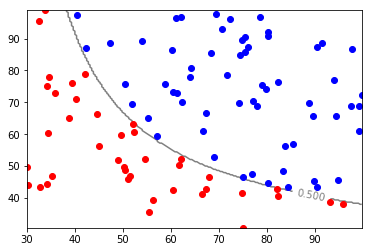

In [7]:
plotBoundary(X, reg2, mesh = 200, function = transform)